In [153]:
import pandas as pd, datetime as dt
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches

print(os.getcwd())
os.chdir("C:/Users/joshg/Desktop")

C:\Users\joshg\Desktop


In [78]:
df = pd.read_csv("covid_approval_polls.csv")
df.head()

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,False,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,False,Do you approve or disapprove of Donald Trump’s...,39.0,25.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
4,2020-02-07,2020-02-09,Morning Consult,NaN,2200.0,a,all,Trump,False,Do you approve or disapprove of the job each o...,57.0,22.0,https://morningconsult.com/wp-content/uploads/...


In [79]:
df.drop('url', axis=1) #Drop URL 

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,False,Do you approve or disapprove of Donald Trump’s...,42.0,29.0
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,False,Do you approve or disapprove of Donald Trump’s...,75.0,6.0
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,False,Do you approve or disapprove of Donald Trump’s...,21.0,51.0
3,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,False,Do you approve or disapprove of Donald Trump’s...,39.0,25.0
4,2020-02-07,2020-02-09,Morning Consult,NaN,2200.0,a,all,Trump,False,Do you approve or disapprove of the job each o...,57.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3165,2021-12-09,2021-12-13,YouGov,Yahoo News,1558.0,a,all,Biden,False,Do you approve or disapprove of the way Presid...,45.0,45.0
3166,2021-12-09,2021-12-13,YouGov,Yahoo News,357.0,a,R,Biden,False,Do you approve or disapprove of the way Presid...,15.0,79.0
3167,2021-12-09,2021-12-13,YouGov,Yahoo News,500.0,a,D,Biden,False,Do you approve or disapprove of the way Presid...,80.0,12.0
3168,2021-12-09,2021-12-13,YouGov,Yahoo News,510.0,a,I,Biden,False,Do you approve or disapprove of the way Presid...,38.0,51.0


In [80]:
df['text'].values #Assess questions asked

array(['Do you approve or disapprove of Donald Trump’s handling of the coronavirus outbreak?',
       'Do you approve or disapprove of Donald Trump’s handling of the coronavirus outbreak?',
       'Do you approve or disapprove of Donald Trump’s handling of the coronavirus outbreak?',
       ...,
       'Do you approve or disapprove of the way President Biden is handling each of the following issues? Coronavirus',
       'Do you approve or disapprove of the way President Biden is handling each of the following issues? Coronavirus',
       'Do you approve or disapprove of the job each of the following is doing in handling the spread of coronavirus in the United States? President Joe Biden'],
      dtype=object)

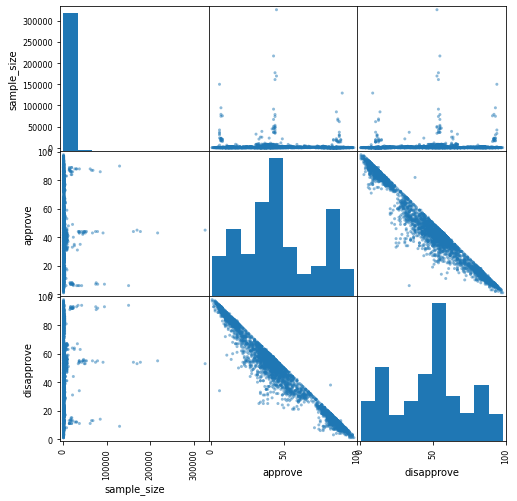

In [81]:
scatter_matrix(df, figsize=[8,8])
plt.show()

# Approval by Party

array([[<AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'I'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'all'}>]], dtype=object)

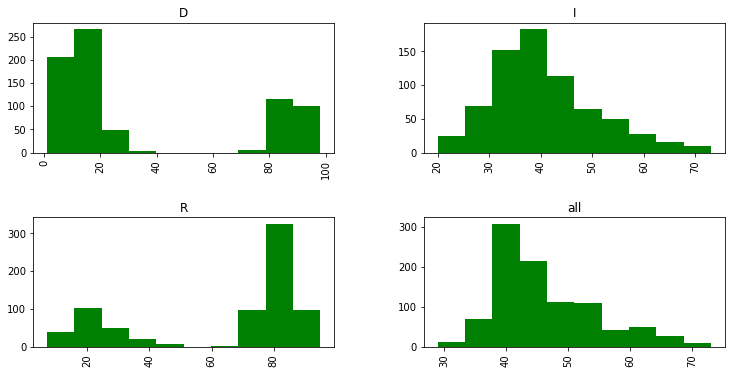

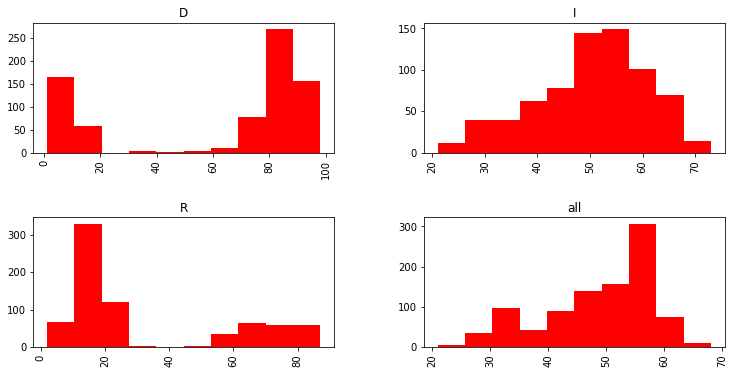

In [82]:
df.hist('approve', color='g', by='party', figsize=[12,6])
df.hist('disapprove', color='red', by='party', figsize=[12,6])

# Approval by Subject

array([<AxesSubplot:title={'center':'Biden'}>,
       <AxesSubplot:title={'center':'Trump'}>], dtype=object)

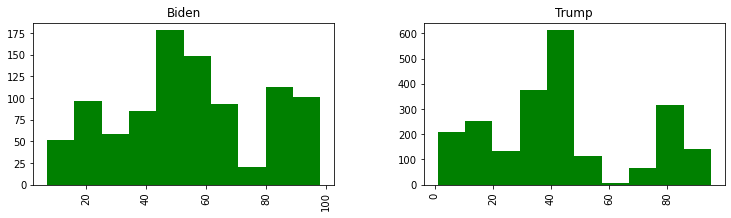

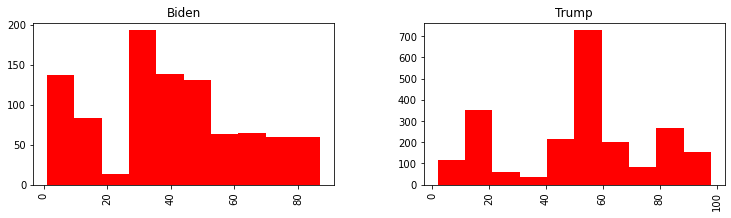

In [83]:
df.hist('approve', color='g', by='subject', figsize=[12,3])
df.hist('disapprove', color='red', by='subject', figsize=[12,3])

In [84]:
rep = df[df["party"] == 'R']
dem = df[df["party"] == 'D']
al = df[df["party"] == 'All']
ind = df[df["party"] == 'I']


# Reps approval

array([<AxesSubplot:title={'center':'Biden'}>,
       <AxesSubplot:title={'center':'Trump'}>], dtype=object)

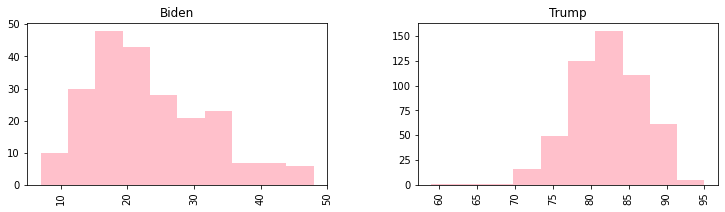

In [85]:
rep.hist('approve', color='pink', by='subject', figsize=[12,3])

# Dems Approval

array([<AxesSubplot:title={'center':'Biden'}>,
       <AxesSubplot:title={'center':'Trump'}>], dtype=object)

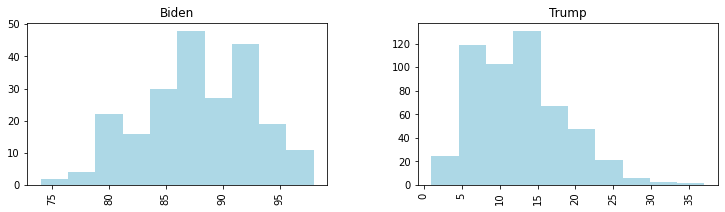

In [86]:
dem.hist('approve', color='lightblue', by='subject', figsize=[12,3])

In [97]:
repgroup = rep.groupby('start_date', as_index=False).mean()
repgroup.columns
demgroup = dem.groupby('start_date', as_index=False).mean()
demgroup.columns

Index(['start_date', 'sample_size', 'approve', 'disapprove'], dtype='object')

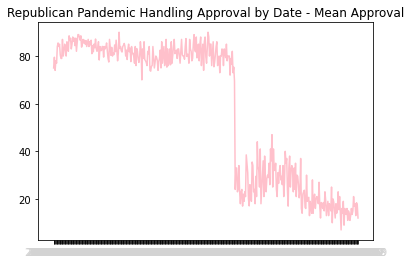

In [88]:
plt.plot(repgroup.start_date, repgroup.approve, color='pink')
plt.title("Republican Pandemic Handling Approval by Date - Mean Approval")
plt.xticks(color='lightgrey')
plt.show()

In [90]:
allgroup = al.groupby('start_date', as_index=False).mean()
allgroup.columns

indgroup = ind.groupby('start_date', as_index=False).mean()
indgroup.columns

Index(['start_date', 'sample_size', 'approve', 'disapprove'], dtype='object')

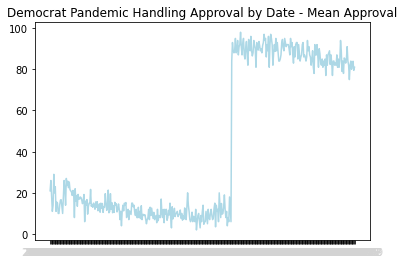

In [98]:
plt.plot(demgroup.start_date, demgroup.approve, color='lightblue')
plt.title("Democrat Pandemic Handling Approval by Date - Mean Approval")
plt.xticks(color='lightgrey')
plt.show()

In [99]:
rep_min_mean = repgroup['approve'].min()
dem_min_mean = demgroup['approve'].min()
rep_max_mean = repgroup['approve'].max()
dem_max_mean = demgroup['approve'].max()
ind_min_mean = indgroup['approve'].min()
ind_max_mean = indgroup['approve'].max()


rep_mean = repgroup['approve'].mean()
dem_mean = demgroup['approve'].mean()
ind_mean = indgroup['approve'].mean()

print("Republican Minimum: " + str(rep_min_mean))
print("Republican Maximum: " + str(rep_max_mean))
print("")
print("Democrat Minimum: " + str(dem_min_mean)) 
print("Democrat Maximum: " + str(dem_max_mean))
print("")
print("Independent Minimum: " + str(ind_min_mean)) 
print("Independent Maximum: " + str(ind_max_mean))
print("")
print("Republican Mean: " + str(rep_mean)) 
print("Democrat Mean: " + str(dem_mean)) 
print("Independent Mean: " + str(ind_mean)) 


Republican Minimum: 7.0
Republican Maximum: 90.0

Democrat Minimum: 2.0
Democrat Maximum: 98.0

Independent Minimum: 23.0
Independent Maximum: 73.0

Republican Mean: 58.069156224899594
Democrat Mean: 42.7788232931727
Independent Mean: 41.81220311220311


In [100]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['week'] = df.apply(lambda row: row['start_date'] - dt.timedelta(days=row['start_date'].weekday()), axis=1)
dfgroup = df.groupby('week', as_index=False).mean()

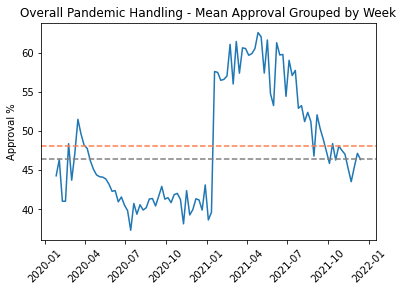

In [137]:
plt.plot(dfgroup.week, dfgroup.approve)
plt.title("Overall Pandemic Handling - Mean Approval Grouped by Week")
plt.xticks(rotation=45)
plt.ylabel('Approval %')
plt.axhline(y=dfgroup.approve.mean(), color='coral', linestyle='--')
plt.axhline(y=dfgroup.approve.median(), color='grey', linestyle='--')
plt.show()

In [143]:
#Republican by Week
repweek = rep['start_date'] = pd.to_datetime(rep['start_date'])
rep['week'] = rep.apply(lambda row: row['start_date'] - dt.timedelta(days=row['start_date'].weekday()), axis=1)
repweek = rep.groupby('week', as_index=False).mean()

#Democrat by Week
demweek = dem['start_date'] = pd.to_datetime(dem['start_date'])
dem['week'] = dem.apply(lambda row: row['start_date'] - dt.timedelta(days=row['start_date'].weekday()), axis=1)
demweek = dem.groupby('week', as_index=False).mean()

display(repweek.head())
display(demweek.head())

<ipython-input-143-9ccd30dec900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repweek = rep['start_date'] = pd.to_datetime(rep['start_date'])
<ipython-input-143-9ccd30dec900>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rep['week'] = rep.apply(lambda row: row['start_date'] - dt.timedelta(days=row['start_date'].weekday()), axis=1)
<ipython-input-143-9ccd30dec900>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,week,sample_size,approve,disapprove
0,2020-01-27,376.000000,75.000000,6.000000
1,2020-02-03,587.333333,77.666667,6.333333
2,2020-02-10,381.000000,78.000000,8.000000
3,2020-02-17,386.000000,77.000000,7.000000
4,2020-02-24,561.400000,84.800000,9.200000


,week,sample_size,approve,disapprove
0,2020-01-27,523.0,21.000000,51.0
1,2020-02-03,705.0,23.666667,49.0
2,2020-02-10,529.0,11.000000,59.0
3,2020-02-17,525.0,14.000000,56.0
4,2020-02-24,694.2,20.600000,67.6


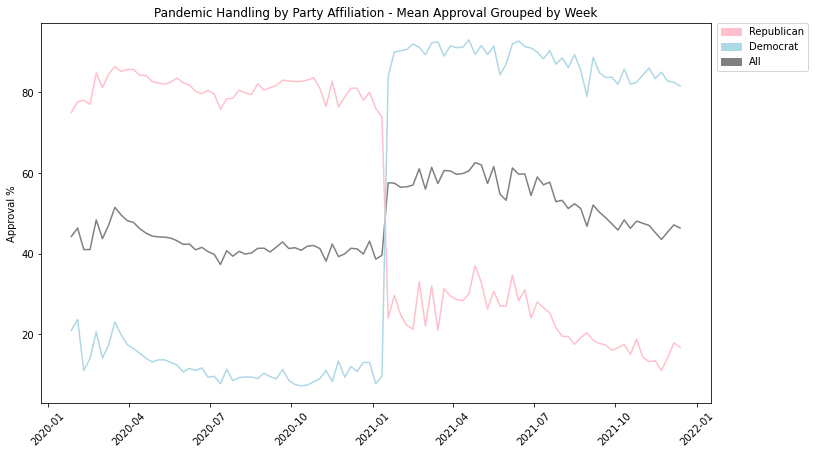

In [176]:
mpl.rcParams['figure.figsize'] = [12,7]

red_patch = mpatches.Patch(color='pink', label='Republican')
blue_patch = mpatches.Patch(color='lightblue', label='Democrat')
grey_patch = mpatches.Patch(color='grey', label='All')

plt.plot(dfgroup.week, dfgroup.approve, color='grey')
plt.plot(repweek.week, repweek.approve, color='pink')
plt.plot(demweek.week, demweek.approve, color='lightblue')
plt.title("Pandemic Handling by Party Affiliation - Mean Approval Grouped by Week")
plt.xticks(rotation=45)
plt.ylabel('Approval %')
plt.legend(handles=[red_patch, blue_patch, grey_patch], bbox_to_anchor=(1.01,1.00), loc="upper left", borderaxespad=0)
plt.show()